### Objetivo: 
### ( En base a que variable nos ceñimos para definir cuando una maquina va a fallar o no ).
### Feature selection ( Pero la vibración ).
### Columna torque.
### Failure type nos guiaría en cuanto a clasificar por tipo de fallo dependiendo del tipo de datos.


¿ Se va a estropear o no la maquina ?
¿ Que tipo de encoding le metemos ?

Lo importante es maximizar el recall para que podamos evitar el falso negativo ( Que nos diga el modelo que la máquina no va a fallar cuando en realidad si que va a fallar).
Porque el falso positivo sería que nos diga el modelo que la máquina va a fallar y en realidad no va a fallar. Además después de revisión verificaríamos que efectivamente no va a fallar y que la máquina está correcta.
### Buscamos un recall lo mas cercano a 1 para tener el menor numero de falsos negativos.
### Buscamos una alta especificidad pero para los falsos positivos

In [1]:
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# Metricas
from sklearn.metrics import classification_report, jaccard_score, roc_auc_score, f1_score, recall_score, precision_score, accuracy_score


In [2]:
df = pd.read_csv("C:/Users/lyes_/Desktop/Second Project Hab/machine failure.csv")
df

#Hacer un drop de TWF, HDF, PWF, OSF y RNGF. HAcer un sample de 8000 para quedarnos con el 80% del dataframe.

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,0,0,0,0,0
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,0,0,0,0,0
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,0,0,0,0,0
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,0,0,0,0,0
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,M24855,M,298.8,308.4,1604,29.5,14,0,0,0,0,0,0
9996,9997,H39410,H,298.9,308.4,1632,31.8,17,0,0,0,0,0,0
9997,9998,M24857,M,299.0,308.6,1645,33.4,22,0,0,0,0,0,0
9998,9999,H39412,H,299.0,308.7,1408,48.5,25,0,0,0,0,0,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      10000 non-null  int64  
 1   Product ID               10000 non-null  object 
 2   Type                     10000 non-null  object 
 3   Air temperature [K]      10000 non-null  float64
 4   Process temperature [K]  10000 non-null  float64
 5   Rotational speed [rpm]   10000 non-null  int64  
 6   Torque [Nm]              10000 non-null  float64
 7   Tool wear [min]          10000 non-null  int64  
 8   Machine failure          10000 non-null  int64  
 9   TWF                      10000 non-null  int64  
 10  HDF                      10000 non-null  int64  
 11  PWF                      10000 non-null  int64  
 12  OSF                      10000 non-null  int64  
 13  RNF                      10000 non-null  int64  
dtypes: float64(3), int64(9)

In [4]:
df.shape

(10000, 14)

In [5]:
df.describe()

,UDI,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000
mean,5000.50000,300.004930,310.005560,1538.776100,39.986910,107.951000,0.033900,0.004600,0.011500,0.009500,0.009800,0.00190
std,2886.89568,2.000259,1.483734,179.284096,9.968934,63.654147,0.180981,0.067671,0.106625,0.097009,0.098514,0.04355
min,1.00000,295.300000,305.700000,1168.000000,3.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,2500.75000,298.300000,308.800000,1423.000000,33.200000,53.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
50%,5000.50000,300.100000,310.100000,1503.000000,40.100000,108.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
75%,7500.25000,301.500000,311.100000,1612.000000,46.800000,162.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
max,10000.00000,304.500000,313.800000,2886.000000,76.600000,253.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      10000 non-null  int64  
 1   Product ID               10000 non-null  object 
 2   Type                     10000 non-null  object 
 3   Air temperature [K]      10000 non-null  float64
 4   Process temperature [K]  10000 non-null  float64
 5   Rotational speed [rpm]   10000 non-null  int64  
 6   Torque [Nm]              10000 non-null  float64
 7   Tool wear [min]          10000 non-null  int64  
 8   Machine failure          10000 non-null  int64  
 9   TWF                      10000 non-null  int64  
 10  HDF                      10000 non-null  int64  
 11  PWF                      10000 non-null  int64  
 12  OSF                      10000 non-null  int64  
 13  RNF                      10000 non-null  int64  
dtypes: float64(3), int64(9)

In [7]:
df.columns

Index(['UDI', 'Product ID', 'Type', 'Air temperature [K]',
       'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]',
       'Tool wear [min]', 'Machine failure', 'TWF', 'HDF', 'PWF', 'OSF',
       'RNF'],
      dtype='object')

#### Regresión Logítica

In [8]:
# Defino las características y el objetivo
features = ['Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]', 'TWF', 'HDF', 'PWF', 'OSF']
target = 'Machine failure'

X = df[features]
y = df[target]

# Divido los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

# Creo y entreno el modelo de regresión logística
logistic_regression = LogisticRegression(class_weight='balanced', random_state=42)
logistic_regression.fit(X_train, y_train)

# Obtengo las predicciones
yhat = logistic_regression.predict(X_test)

# Evaluo el modelo
print(classification_report(y_test, yhat))
print("ROC-AUC Score:", roc_auc_score(y_test, yhat))

# Imprimo los coeficientes del modelo
print("Coeficientes:", logistic_regression.coef_)
print("Intercepto:", logistic_regression.intercept_)

# Muestro las primeras predicciones y sus valores reales
for pred, real in zip(yhat[:5], y_test[:5]):
    print(f"Predicción: {pred} \tValor real: {real}")

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2907
           1       1.00      0.97      0.98        93

    accuracy                           1.00      3000
   macro avg       1.00      0.98      0.99      3000
weighted avg       1.00      1.00      1.00      3000

ROC-AUC Score: 0.9838709677419355
Coeficientes: [[-1.35504344e-03  1.57342759e-02  5.98496965e-03  7.65497591e+00
   9.29593814e+00  8.96163694e+00  6.48088806e+00]]
Intercepto: [-2.62111965]
Predicción: 0 	Valor real: 0
Predicción: 0 	Valor real: 1
Predicción: 0 	Valor real: 0
Predicción: 0 	Valor real: 0
Predicción: 0 	Valor real: 0


c:\Users\lyes_\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [9]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, yhat, labels = [0, 1])

array([[2907,    0],
       [   3,   90]], dtype=int64)

### Primero voy a tratar de escalar los datos y luego voy a tratar de aumentar el número de iteraciones si sigo experimentando problemas de convergencia

In [12]:
from sklearn.preprocessing import StandardScaler

# Defino las características y el objetivo
features = ['Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]', 'TWF', 'HDF', 'PWF', 'OSF']
target = 'Machine failure'

X = df[features]
y = df[target]

# Divido los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

# Escalar los datos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Creo y entreno el modelo de regresión logística
logistic_regression = LogisticRegression(class_weight='balanced', random_state=42)
logistic_regression.fit(X_train_scaled, y_train)

# Obtengo las predicciones
yhat = logistic_regression.predict(X_test_scaled)

# Evaluo el modelo
print(classification_report(y_test, yhat))
print("ROC-AUC Score:", roc_auc_score(y_test, yhat))

# Imprimo los coeficientes del modelo
print("Coeficientes:", logistic_regression.coef_)
print("Intercepto:", logistic_regression.intercept_)

# Muestro las primeras predicciones y sus valores reales
for pred, real in zip(yhat[:5], y_test[:5]):
    print(f"Predicción: {pred} \tValor real: {real}")

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2907
           1       1.00      0.97      0.98        93

    accuracy                           1.00      3000
   macro avg       1.00      0.98      0.99      3000
weighted avg       1.00      1.00      1.00      3000

ROC-AUC Score: 0.9838709677419355
Coeficientes: [[0.36586476 0.62639576 0.37596956 0.80804893 1.37233405 1.14839943
  1.09244561]]
Intercepto: [-3.37375337]
Predicción: 0 	Valor real: 0
Predicción: 0 	Valor real: 1
Predicción: 0 	Valor real: 0
Predicción: 0 	Valor real: 0
Predicción: 0 	Valor real: 0


In [13]:
confusion_matrix(y_test, yhat, labels = [0, 1])

array([[2907,    0],
       [   3,   90]], dtype=int64)

In [14]:
# Creo y entreno el modelo de regresión logística con más iteraciones
logistic_regression = LogisticRegression(class_weight='balanced', random_state=42, max_iter=1000)
logistic_regression.fit(X_train_scaled, y_train)

# Obtengo las predicciones
yhat = logistic_regression.predict(X_test_scaled)

# Evaluo el modelo
print(classification_report(y_test, yhat))
print("ROC-AUC Score:", roc_auc_score(y_test, yhat))

# Imprimo los coeficientes del modelo
print("Coeficientes:", logistic_regression.coef_)
print("Intercepto:", logistic_regression.intercept_)

# Muestro las primeras predicciones y sus valores reales
for pred, real in zip(yhat[:5], y_test[:5]):
    print(f"Predicción: {pred} \tValor real: {real}")

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2907
           1       1.00      0.97      0.98        93

    accuracy                           1.00      3000
   macro avg       1.00      0.98      0.99      3000
weighted avg       1.00      1.00      1.00      3000

ROC-AUC Score: 0.9838709677419355
Coeficientes: [[0.36586476 0.62639576 0.37596956 0.80804893 1.37233405 1.14839943
  1.09244561]]
Intercepto: [-3.37375337]
Predicción: 0 	Valor real: 0
Predicción: 0 	Valor real: 1
Predicción: 0 	Valor real: 0
Predicción: 0 	Valor real: 0
Predicción: 0 	Valor real: 0


In [15]:
confusion_matrix(y_test, yhat, labels = [0, 1])

array([[2907,    0],
       [   3,   90]], dtype=int64)

### Parece que no tengo problemas de convergencia aún así voy a aumentar el número de iteraciones por si acaso

In [16]:
# Creo y entreno el modelo de regresión logística con más iteraciones
logistic_regression = LogisticRegression(class_weight='balanced', random_state=42, max_iter=1000)
logistic_regression.fit(X_train_scaled, y_train)

# Obtengo las predicciones
yhat = logistic_regression.predict(X_test_scaled)

# Evaluo el modelo
print(classification_report(y_test, yhat))
print("ROC-AUC Score:", roc_auc_score(y_test, yhat))

# Imprimo los coeficientes del modelo
print("Coeficientes:", logistic_regression.coef_)
print("Intercepto:", logistic_regression.intercept_)

# Muestro las primeras predicciones y sus valores reales
for pred, real in zip(yhat[:5], y_test[:5]):
    print(f"Predicción: {pred} \tValor real: {real}")

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2907
           1       1.00      0.97      0.98        93

    accuracy                           1.00      3000
   macro avg       1.00      0.98      0.99      3000
weighted avg       1.00      1.00      1.00      3000

ROC-AUC Score: 0.9838709677419355
Coeficientes: [[0.36586476 0.62639576 0.37596956 0.80804893 1.37233405 1.14839943
  1.09244561]]
Intercepto: [-3.37375337]
Predicción: 0 	Valor real: 0
Predicción: 0 	Valor real: 1
Predicción: 0 	Valor real: 0
Predicción: 0 	Valor real: 0
Predicción: 0 	Valor real: 0


### Random Forest

In [312]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score


# Define features and target
features = ['Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]', 'Air temperature [K]', 'Process temperature [K]']
target = 'Machine failure'

# Selección de características y variable objetivo
X = df[features]
y = df[target]

# Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entrenamiento del modelo
model = RandomForestClassifier(n_estimators=1000, random_state=42)
model.fit(X_train, y_train)

# Predicción
y_pred = model.predict(X_test)

# Evaluación del modelo
print(classification_report(y_test, y_pred))
print("ROC-AUC Score:", roc_auc_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1939
           1       0.86      0.59      0.70        61

    accuracy                           0.98      2000
   macro avg       0.92      0.79      0.85      2000
weighted avg       0.98      0.98      0.98      2000

ROC-AUC Score: 0.7935347779402937


### Especificidad ( Specificity)

In [313]:
from sklearn.metrics import recall_score, confusion_matrix
def especificidad_score(true, predicted):
    tn, fp, fn, tp = confusion_matrix(true, predicted).ravel()
    especificidad = tn / (tn + fp)
    return especificidad

In [314]:
y_pred_proba = model.predict_proba(X_test)

scores = {
    "recall" : [],
    "precision": [],
    "especificidad": [],
}

for i in np.arange(0.0, 1.0, 0.001):
    yhat = [int(val[1] > i) for val in y_pred_proba]
    recall = recall_score(y_test, yhat)
    precision = precision_score(y_test, yhat)
    especificidad = especificidad_score(y_test, yhat)
    scores["recall"].append(recall)
    scores["precision"].append(precision)
    scores["especificidad"].append(especificidad)

c:\Users\lyes_\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.

c:\Users\lyes_\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.

c:\Users\lyes_\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.

c:\Users\lyes_\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.

c:\Users\lyes_\anaconda3\Lib\site-pa

In [315]:
import plotly.express as px

px.line(scores)

- **Precision**: La precisión mide la habilidad del clasificador para no predecir un caso negativo como un caso positivo.

$$Precision = \frac{VP }{VP + FP}$$

- **Recall (Sensibilidad o  Exhaustividad)**: Es la habilidad del clasificador para predecir casos positivos como positivos. Esta métrica se suele utilizar en el ámbito médico debido a que da prioridad a predicción o clasificación de pacientes enfermos como enfermos sin dar el mismo nivel de importancia si un paciente sano se clasifica como enfermo.

$$Recall = \frac{VP}{VP + FN}$$


- **Specificity (Especificidad)**: Muestra la habilidad del clasificador para predecir verdaderos negativos reales correctamente. 

$$ Specificity = \frac{VN}{VN + FP}$$

In [316]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred, labels = [0, 1])

array([[1933,    6],
       [  25,   36]], dtype=int64)

### tener esto en cuenta en smote and company.

[1537 +5     0
0           58]

In [317]:
#Data is already loaded and split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Here I create and train the model with class weights
model = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

# Métricas
print("Jaccard Index:", jaccard_score(y_test,  y_pred, average = "macro"))
print("Accuracy:"     , accuracy_score(y_test,  y_pred))
print("Precisión:"    , precision_score(y_test,  y_pred, average = "macro"))
print("Sensibilidad:" , recall_score(y_test, y_pred, average = "macro"))
print("F1-score:"     , f1_score(y_test, y_pred, average = "macro"))
print("ROC AUC:"      , roc_auc_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1939
           1       0.91      0.51      0.65        61

    accuracy                           0.98      2000
   macro avg       0.95      0.75      0.82      2000
weighted avg       0.98      0.98      0.98      2000

Jaccard Index: 0.7338076117318435
Accuracy: 0.9835
Precisión: 0.9482526479564359
Sensibilidad: 0.7533247660193272
F1-score: 0.8220904373610082
ROC AUC: 0.7533247660193271


### Aquí aplico SMOTE y un BalancedRandomForestClassifier

In [318]:
from imblearn.over_sampling import SMOTE
from imblearn.ensemble import BalancedRandomForestClassifier
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply SMOTE to the training data
#smote = SMOTE(random_state=42)
#X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Train a Balanced Random Forest model
model = BalancedRandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))
print("ROC-AUC Score:", roc_auc_score(y_test, y_pred))

c:\Users\lyes_\anaconda3\Lib\site-packages\imblearn\ensemble\_forest.py:546: FutureWarning:

The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.

c:\Users\lyes_\anaconda3\Lib\site-packages\imblearn\ensemble\_forest.py:558: FutureWarning:

The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.



              precision    recall  f1-score   support

           0       1.00      0.90      0.94      1939
           1       0.23      0.97      0.37        61

    accuracy                           0.90      2000
   macro avg       0.61      0.93      0.66      2000
weighted avg       0.98      0.90      0.93      2000

ROC-AUC Score: 0.9317757167375443


#### Best results to detect machine failure ATM above!!!! Try to add threshold and check results

In [319]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred, labels = [0, 1])

array([[1738,  201],
       [   2,   59]], dtype=int64)

In [320]:
y_train.value_counts()

Machine failure
0    7722
1     278
Name: count, dtype: int64

In [321]:
y_pred_proba = model.predict_proba(X_test)

scores = {
    "recall" : [],
    "precision": [],
}

for i in np.arange(0.0, 1.0, 0.01):
    yhat = [int(val[1] > i) for val in y_pred_proba]
    recall = recall_score(y_test, yhat)
    precision = precision_score(y_test, yhat)
    scores["recall"].append(recall)
    scores["precision"].append(precision)

In [322]:
import plotly.express as px

px.line(scores)

In [323]:
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply SMOTE to the training data
smote = SMOTE(sampling_strategy = 0.5, random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Train a Balanced Random Forest model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train_resampled, y_train_resampled)

# Predict and evaluate
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))
print("ROC-AUC Score:", roc_auc_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.97      0.98      1939
           1       0.46      0.72      0.56        61

    accuracy                           0.97      2000
   macro avg       0.72      0.85      0.77      2000
weighted avg       0.97      0.97      0.97      2000

ROC-AUC Score: 0.8472467640071356


In [324]:
#Aquí trato de ajustar la decisión threshold para mejorar el recall
from sklearn.metrics import classification_report, roc_auc_score, precision_recall_curve

# I train the model
model = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
model.fit(X_train_resampled, y_train_resampled)

# Then I get the predicted probabilities
y_proba = model.predict_proba(X_test)[:, 1]

# I try to find the optimal threshold
precision, recall, thresholds = precision_recall_curve(y_test, y_proba)
f1_scores = 2 * (precision * recall) / (precision + recall)
best_threshold = thresholds[np.argmax(f1_scores)]

# I apply the best threshold as per the analysis I did.
y_pred_adjusted = (y_proba >= best_threshold).astype(int)

# I evaluate the adjusted predictions
print(classification_report(y_test, y_pred_adjusted))
print("ROC-AUC Score:", roc_auc_score(y_test, y_pred_adjusted))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1939
           1       0.67      0.56      0.61        61

    accuracy                           0.98      2000
   macro avg       0.83      0.77      0.80      2000
weighted avg       0.98      0.98      0.98      2000

ROC-AUC Score: 0.7743048216505043


The new results show some improvement in the recall for the failure class (class 1) but there is still room for improvement. Here’s an analysis and additional suggestions:
Analysis of Updated Results

    Precision for class 1 (Failure): 0.70
        This indicates that 70% of the predicted failures are correct.

    Recall for class 1 (Failure): 0.42
        The recall has improved, but the model is still missing 58% of actual failures.

    F1-score for class 1 (Failure): 0.52
        This reflects a balance between precision and recall, but it still indicates that the model struggles with detecting failures accurately.

    Support: 2307 instances of no failure and 93 instances of failure.
        The class imbalance continues to be a challenge.

Recommendations for Further Improvement

    Further Resampling:
        Try combining both oversampling the minority class and undersampling the majority class to see if this improves recall.

    Use Different Models:
        Consider using other models that might handle imbalance better, such as Gradient Boosting Machines (GBM) or XGBoost with appropriate class weights.

    Advanced Ensemble Techniques:
        Try ensemble techniques specifically designed for imbalanced data, like EasyEnsemble or BalanceCascade from the imbalanced-learn library.

    Feature Engineering:
        Add interaction terms or polynomial features that might capture the relationships between existing features more effectively.

    Hyperparameter Tuning:
        Perform a comprehensive grid search or random search for hyperparameter tuning. Focus on parameters that control the model complexity and class weight balancing.

    Custom Loss Functions:
        Implement custom loss functions that penalize false negatives more heavily than false positives.

In [325]:
# Renombro las columnas porque no está manejando bien los nombres de las columnas
df1 = df.rename(columns={
    'Rotational speed [rpm]': 'Rotational_speed_rpm',
    'Torque [Nm]': 'Torque_Nm',
    'Tool Wear [min]': 'Tool_wear_min'
})

# Verificamos los nuevos nombres de las columnas
print(df1.columns)

Index(['UDI', 'Product ID', 'Type', 'Air temperature [K]',
       'Process temperature [K]', 'Rotational_speed_rpm', 'Torque_Nm',
       'Tool wear [min]', 'Machine failure', 'TWF', 'HDF', 'PWF', 'OSF',
       'RNF'],
      dtype='object')


In [326]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, roc_auc_score
from imblearn.over_sampling import SMOTE

# Renombro las columnas porque no está manejando bien los nombres de las columnas
df = df.rename(columns={
    'Rotational speed [rpm]': 'Rotational_speed_rpm',
    'Torque [Nm]': 'Torque_Nm',
    'Tool wear [min]' : 'Tool_wear_min'
})

# Verificamos los nuevos nombres de las columnas
print(df.columns)

# Definir las características y el objetivo con los nuevos nombres
features1 = ['Rotational_speed_rpm', 'Torque_Nm', 'Tool_wear_min']
target = 'Machine failure'

X = df[features1]
y = df[target]

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Aplicar SMOTE a los datos de entrenamiento
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Entrenar un modelo XGBoost con pesos de clase
weights = {0: 1, 1: 2307 / 93}  # Ajustar el peso de la clase inversamente proporcional a la frecuencia de la clase
model = XGBClassifier(scale_pos_weight=weights[1], use_label_encoder=False, eval_metric='logloss')
model.fit(X_train_resampled, y_train_resampled)

# Predecir y evaluar
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))
print("ROC-AUC Score:", roc_auc_score(y_test, y_pred))

Index(['UDI', 'Product ID', 'Type', 'Air temperature [K]',
       'Process temperature [K]', 'Rotational_speed_rpm', 'Torque_Nm',
       'Tool_wear_min', 'Machine failure', 'TWF', 'HDF', 'PWF', 'OSF', 'RNF'],
      dtype='object')
              precision    recall  f1-score   support

           0       0.99      0.85      0.92      2907
           1       0.16      0.85      0.26        93

    accuracy                           0.85      3000
   macro avg       0.57      0.85      0.59      3000
weighted avg       0.97      0.85      0.90      3000

ROC-AUC Score: 0.8509437730949766


In [327]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred, labels = [0, 1])

array([[2478,  429],
       [  14,   79]], dtype=int64)

In [328]:
#Threshold Adjustment con XGBoost

# Predict probabilities
y_proba = model.predict_proba(X_test)[:, 1]

# Find the optimal threshold
precision, recall, thresholds = precision_recall_curve(y_test, y_proba)
f1_scores = 2 * (precision * recall) / (precision + recall)
best_threshold = thresholds[np.argmax(f1_scores)]

# Apply the best threshold
y_pred_adjusted = (y_proba >= best_threshold).astype(int)

# Evaluate the adjusted predictions
print(classification_report(y_test, y_pred_adjusted))
print("ROC-AUC Score:", roc_auc_score(y_test, y_pred_adjusted))

              precision    recall  f1-score   support

           0       0.99      0.98      0.98      2907
           1       0.48      0.54      0.51        93

    accuracy                           0.97      3000
   macro avg       0.73      0.76      0.75      3000
weighted avg       0.97      0.97      0.97      3000

ROC-AUC Score: 0.7595292786044808


In [329]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred, labels = [0, 1])

array([[2478,  429],
       [  14,   79]], dtype=int64)

In [330]:
#Pruebo RandomForestClassifier() usando diferentes parametros

model = RandomForestClassifier(n_estimators     = 200,
                               criterion        = "entropy",
                               max_depth        = 15,
                               min_samples_split = 10,
                               max_features = "log2",
                               random_state = 42,
                               max_leaf_nodes = 40)

# Entrenamiento
model.fit(X_train, y_train)

#Predicciones
yhat = model.predict(X_test)

#Métricas
print("Jaccard Index:", jaccard_score(y_test, yhat, average = "macro"))
print("Accuracy:"     , accuracy_score(y_test, yhat))
print("Precisión:"    , precision_score(y_test, yhat, average = "macro"))
print("Sensibilidad:" , recall_score(y_test, yhat, average = "macro"))
print("F1-score:"     , f1_score(y_test, yhat, average = "macro"))

Jaccard Index: 0.6659750966664963
Accuracy: 0.9786666666666667
Precisión: 0.9170286599790635
Sensibilidad: 0.6871400512666866
F1-score: 0.7557388644910463


In [331]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Normalizacion
from sklearn.preprocessing import MinMaxScaler

# Train, Test
from sklearn.model_selection import train_test_split

# Metricas
from sklearn.metrics import jaccard_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn. metrics import mean_absolute_error
from sklearn. metrics import mean_squared_error

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [332]:
# Normalización de datos

x_scaler = MinMaxScaler()
X = x_scaler.fit_transform(X)

X

array([[0.22293364, 0.53571429, 0.        ],
       [0.13969732, 0.58379121, 0.01185771],
       [0.19208382, 0.62637363, 0.01976285],
       ...,
       [0.27764843, 0.40659341, 0.08695652],
       [0.13969732, 0.61401099, 0.09881423],
       [0.19324796, 0.5       , 0.11857708]])

In [333]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

print(f"X_train: {X_train.shape}, y_train: {y_train.shape}")
print(f"X_test: {X_test.shape},  y_test: {y_test.shape}")

X_train: (7000, 3), y_train: (7000,)
X_test: (3000, 3),  y_test: (3000,)


### Modelo de árbol de decisión

In [334]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(criterion = "entropy", max_depth = 3)
model.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [335]:
yhat = model.predict(X_test)

yhat

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [336]:
print("Jaccard Index:", jaccard_score(y_test, yhat, average = "macro"))
print("Accuracy:"     , accuracy_score(y_test, yhat))
print("Precisión:"    , precision_score(y_test, yhat, average = "macro"))
print("recall:"       , recall_score(y_test, yhat, average = "macro"))
print("F1-score:"     , f1_score(y_test, yhat, average = "macro"))

Jaccard Index: 0.5901733204179063
Accuracy: 0.9743333333333334
Precisión: 0.9044018817204301
recall: 0.6068388872243861
F1-score: 0.6643958908109852


## Confusion Matrix

In [337]:
confusion_matrix(y_test, yhat, labels = [0, 1])

array([[2903,    4],
       [  73,   20]], dtype=int64)

In [338]:
print(classification_report(y_test, yhat, digits = 3))

              precision    recall  f1-score   support

           0      0.975     0.999     0.987      2907
           1      0.833     0.215     0.342        93

    accuracy                          0.974      3000
   macro avg      0.904     0.607     0.664      3000
weighted avg      0.971     0.974     0.967      3000



### Atributos y Métodos

In [339]:
# .predict_proba()

model.predict_proba(X_test)

array([[0.99748879, 0.00251121],
       [0.99748879, 0.00251121],
       [0.99748879, 0.00251121],
       ...,
       [0.99748879, 0.00251121],
       [0.99748879, 0.00251121],
       [0.99748879, 0.00251121]])

In [340]:
X = df[features1]
y = df[target]

In [341]:
# .feature_importances_ es un atributo que retorna un array con las importancias de cada columna
# En este caso como entrenamos con 4 columnas tenemos un array de 4 elementos.

importances = model.feature_importances_

In [342]:
# Create a DataFrame to visualize the feature importances
feature_importances = pd.DataFrame({
    'Feature': features1,
    'Importance': importances
})

# Sort by importance
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

# Display
print(feature_importances)

                Feature  Importance
0  Rotational_speed_rpm    0.441985
1             Torque_Nm    0.291541
2         Tool_wear_min    0.266474


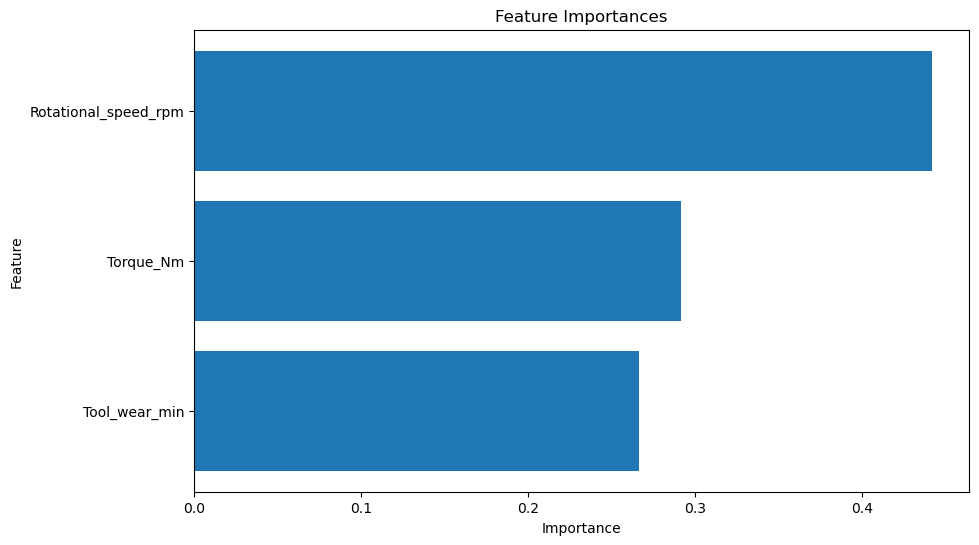

In [343]:
#Visualization of the feature importances.

plt.figure(figsize=(10, 6))
plt.barh(feature_importances['Feature'], feature_importances['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances')
plt.gca().invert_yaxis()
plt.show()

In [344]:
from sklearn.tree import plot_tree

plt.figure(figsize = (100, 200))

plot_tree(model) 

plt.savefig("Machine_failure_tree.jpg")

plt.show()

In [345]:
# Parametros del Modelo, definidos por defecto

print(f"criterion: {model.criterion}")
print(f"splitter: {model.splitter}")
print(f"max_depth: {model.max_depth}")
print(f"min_samples_split: {model.min_samples_split}")
print(f"min_samples_leaf: {model.min_samples_leaf}")
print(f"min_weight_fraction_leaf: {model.min_weight_fraction_leaf}")
print(f"max_features: {model.max_features}")
print(f"random_state: {model.random_state}")
print(f"max_leaf_nodes: {model.max_leaf_nodes}")
print(f"min_impurity_decrease: {model.min_impurity_decrease}")
print(f"class_weight: {model.class_weight}")
print(f"ccp_alpha: {model.ccp_alpha}")

criterion: entropy
splitter: best
max_depth: 3
min_samples_split: 2
min_samples_leaf: 1
min_weight_fraction_leaf: 0.0
max_features: None
random_state: None
max_leaf_nodes: None
min_impurity_decrease: 0.0
class_weight: None
ccp_alpha: 0.0


In [346]:
# .get_params() retorna un diccionario con los parametros del modelo

model.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'entropy',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'random_state': None,
 'splitter': 'best'}

In [347]:
print(f"Profundidad: {model.get_depth()}")
print(f"Numero de nodos hoja: {model.get_n_leaves()}")

Profundidad: 3
Numero de nodos hoja: 8


### SVM

In [348]:
# Normalización de datos

x_scaler = MinMaxScaler()
X = x_scaler.fit_transform(X)

X

array([[0.22293364, 0.53571429, 0.        ],
       [0.13969732, 0.58379121, 0.01185771],
       [0.19208382, 0.62637363, 0.01976285],
       ...,
       [0.27764843, 0.40659341, 0.08695652],
       [0.13969732, 0.61401099, 0.09881423],
       [0.19324796, 0.5       , 0.11857708]])

In [349]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

print(f"X_train: {X_train.shape}, y_train: {y_train.shape}")
print(f"X_test: {X_test.shape},  y_test: {y_test.shape}")

X_train: (7000, 3), y_train: (7000,)
X_test: (3000, 3),  y_test: (3000,)


In [350]:
yhat = model.predict(X_test)

yhat

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [351]:
from sklearn.svm import SVC
model = SVC(probability = True, kernel = "poly")
model.fit(X_train, y_train)

# probability = True para poder usar .predict_proba(), esto puede hacer que el algoritmo sea más lento

SVC(kernel='poly', probability=True)

In [352]:
yhat = model.predict(X_test)

yhat

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [353]:
print("Jaccard Index:", jaccard_score(y_test, yhat, average = "macro"))
print("Accuracy:"     , accuracy_score(y_test, yhat))
print("Precisión:"    , precision_score(y_test, yhat, average = "macro"))
print("Sensibilidad:" , recall_score(y_test, yhat, average = "macro"))
print("F1-score:"     , f1_score(y_test, yhat, average = "macro"))

Jaccard Index: 0.5117376478528043
Accuracy: 0.9703333333333334
Precisión: 0.9019706078824316
Sensibilidad: 0.5267097218060965
F1-score: 0.5429639557753437


### Matriz de confusión

In [354]:
confusion_matrix(y_test, yhat, labels = [0, 1])

array([[2906,    1],
       [  88,    5]], dtype=int64)

### Atributos y Métodos

In [355]:
# .predict_proba()

model.predict_proba(X_test)

# Solo se puede usar si probability = True

array([[0.97017629, 0.02982371],
       [0.97335534, 0.02664466],
       [0.98986854, 0.01013146],
       ...,
       [0.97792416, 0.02207584],
       [0.98919445, 0.01080555],
       [0.99747815, 0.00252185]])

In [356]:
model.support_vectors_

array([[0.08207218, 0.79258242, 0.22134387],
       [0.07683353, 0.73351648, 0.68774704],
       [0.10477299, 0.75961538, 0.7944664 ],
       ...,
       [0.09604191, 0.86401099, 0.81027668],
       [0.11990687, 0.60576923, 0.87747036],
       [0.11699651, 0.71978022, 0.82213439]])

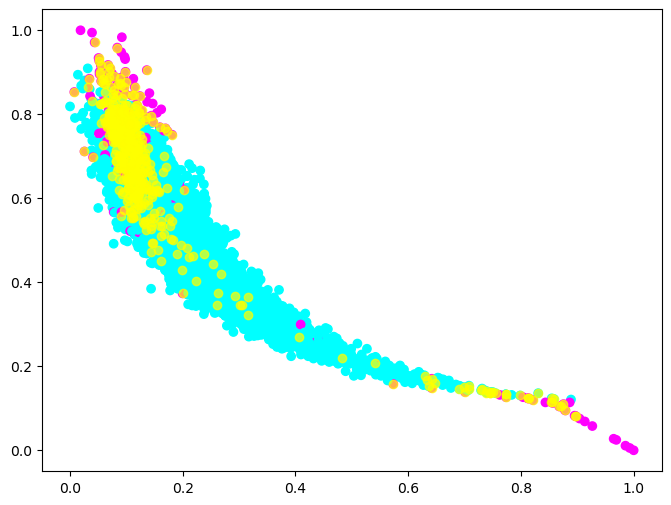

In [357]:
plt.figure(figsize = (8, 6))

#Puntos de Train
plt.scatter(X_train[:, 0], X_train[:, 1], c = y_train, cmap = "cool")

# Puntos de Test
plt.scatter(X_test[:, 0], X_test[:, 1], c = y_test, cmap = "cool")

# Vectores de Soporte
vectores_soporte = model.support_vectors_

plt.plot(vectores_soporte[:, 0], vectores_soporte[:, 1], color = "yellow", marker = "o", linestyle = "", alpha = 0.7)

plt.show()

c:\Users\lyes_\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning:

X does not have valid feature names, but SVC was fitted with feature names



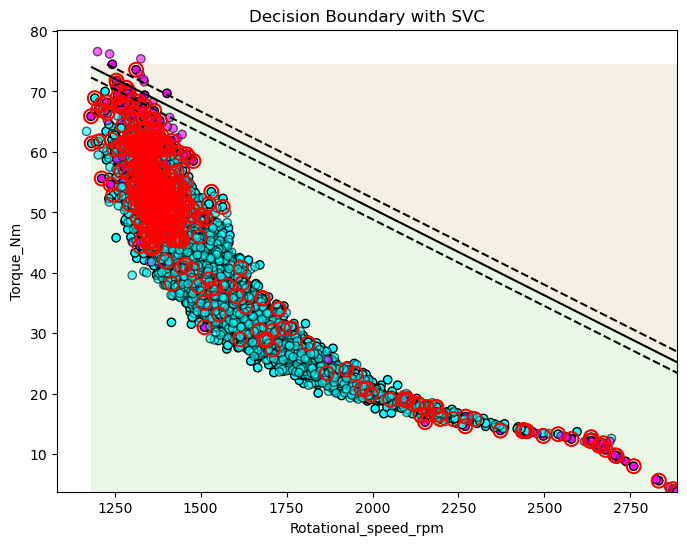

In [358]:
# Select two features for visualization
features_for_viz = ['Rotational_speed_rpm', 'Torque_Nm']
X_viz = df[features_for_viz]
y_viz = df[target]

# Split data for visualization
X_train_viz, X_test_viz, y_train_viz, y_test_viz = train_test_split(X_viz, y_viz, test_size=0.3, random_state=42)

# Train a model for visualization (using SVC for its decision_function)
viz_model = SVC(kernel='linear')
viz_model.fit(X_train_viz, y_train_viz)

# Create the mesh grid for plotting
x_min, x_max = X_train_viz.iloc[:, 0].min(), X_train_viz.iloc[:, 0].max()
y_min, y_max = X_train_viz.iloc[:, 1].min(), X_train_viz.iloc[:, 1].max()
XX, YY = np.meshgrid(np.linspace(x_min, x_max, 200), np.linspace(y_min, y_max, 200))

# Calculate decision boundary
Z = viz_model.decision_function(np.c_[XX.ravel(), YY.ravel()])
Z = Z.reshape(XX.shape)

# Plotting
plt.figure(figsize=(8, 6))

# Plot the decision boundary and margin
plt.contourf(XX, YY, Z > 0, alpha=0.4, cmap='Pastel1')
plt.contour(XX, YY, Z, colors=['black'], linestyles=['--', '-', '--'], levels=[-1, 0, 1])

# Plot training points
plt.scatter(X_train_viz.iloc[:, 0], X_train_viz.iloc[:, 1], c=y_train_viz, cmap='cool', edgecolors='k')

# Plot testing points
plt.scatter(X_test_viz.iloc[:, 0], X_test_viz.iloc[:, 1], c=y_test_viz, cmap='cool', edgecolors='k', alpha=0.6)

# Highlight support vectors
plt.scatter(viz_model.support_vectors_[:, 0], viz_model.support_vectors_[:, 1], facecolors='none', edgecolors='r', s=100, linewidths=1.5)

plt.xlabel(features_for_viz[0])
plt.ylabel(features_for_viz[1])
plt.title('Decision Boundary with SVC')
plt.show()

### Como vamos a afrontar determinar los 5 tipos de fallo.

In [359]:
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression

In [361]:
#Mayor Roc AUC es lo ideal y a partir de ahí modificar el módelo con mejor resutlado.
##Meterle solo los módelos que tengan predict proba. Gaussian no tiene. HAcer un bucle for para los 5 targets o hacerlo por separado pero meterlo todo en una tabla o lista

# Lista de modelos
models = [
    BernoulliNB(),
    KNeighborsClassifier(),
    RandomForestClassifier(),
    AdaBoostClassifier(),
    GradientBoostingClassifier(),
    LogisticRegression(max_iter=1000)
]

# Definir las características y targets
features = ['Rotational_speed_rpm', 'Torque_Nm', 'Tool_wear_min', 'Air temperature [K]', 'Process temperature [K]']
targets = ['TWF', 'HDF', 'PWF', 'OSF', 'RNF']

# Diccionario para almacenar resultados
results = {}

for target in targets:
    print(f"Evaluando target: {target}\n")
    results[target] = {}
    
    X = df[features]
    y = df[target]

    # Train test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    for model in models:
        model_name = model.__class__.__name__
        
        # Entrenamiento del modelo
        model.fit(X_train, y_train)
        
        # Predicción
        y_pred = model.predict(X_test)
        
        # Evaluación del modelo
        report = classification_report(y_test, y_pred, output_dict=True)
        roc_auc = roc_auc_score(y_test, y_pred)
        
        # Almacenamos los resultados en el diccionario
        results[target][model_name] = {
            "precision": report['weighted avg']['precision'],
            "recall": report['weighted avg']['recall'],
            "f1-score": report['weighted avg']['f1-score'],
            "roc_auc": roc_auc
        }

# Mostrar los resultados
for target, target_results in results.items():
    print(f"\nResultados para target: {target}")
    df_results = pd.DataFrame(target_results).T
    print(df_results)

#Sort values by ROC AUC. hacer un "punto de corte" entre recall y precisión. Un recall 

Evaluando target: TWF



c:\Users\lyes_\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

c:\Users\lyes_\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

c:\Users\lyes_\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

c:\Users\lyes_\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

c:\U

Evaluando target: HDF



c:\Users\lyes_\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

c:\Users\lyes_\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

c:\Users\lyes_\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

c:\Users\lyes_\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning:

The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.



Evaluando target: PWF



c:\Users\lyes_\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

c:\Users\lyes_\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

c:\Users\lyes_\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

c:\Users\lyes_\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning:

The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.



Evaluando target: OSF



c:\Users\lyes_\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

c:\Users\lyes_\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

c:\Users\lyes_\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

c:\Users\lyes_\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning:

The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.



Evaluando target: RNF



c:\Users\lyes_\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

c:\Users\lyes_\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

c:\Users\lyes_\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

c:\Users\lyes_\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

c:\U


Resultados para target: TWF
                            precision  recall  f1-score   roc_auc
BernoulliNB                  0.989030  0.9945  0.991758  0.500000
KNeighborsClassifier         0.989030  0.9945  0.991758  0.500000
RandomForestClassifier       0.989030  0.9945  0.991758  0.500000
AdaBoostClassifier           0.989028  0.9940  0.991508  0.499749
GradientBoostingClassifier   0.989022  0.9930  0.991007  0.499246
LogisticRegression           0.989028  0.9940  0.991508  0.499749

Resultados para target: HDF
                            precision  recall  f1-score   roc_auc
BernoulliNB                  0.983072  0.9915  0.987268  0.500000
KNeighborsClassifier         0.983068  0.9910  0.987018  0.499748
RandomForestClassifier       0.997396  0.9975  0.997380  0.882101
AdaBoostClassifier           0.999001  0.9990  0.998969  0.941176
GradientBoostingClassifier   0.996000  0.9960  0.996000  0.881344
LogisticRegression           0.992400  0.9935  0.992337  0.675966

Resultados para t

c:\Users\lyes_\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

c:\Users\lyes_\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

c:\Users\lyes_\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



#### Abajo un ejemplo de sacar la probabilidad en base a que la máquina falle con un fallo concreto. Esto es pseudocódigo

In [363]:
def load_models(path):
    with open(path + "model1.pkl", "br") as file:
        model1 = pkl.load(file)
    return model1, model2, model3, model4, model5

def predict(X):
    X = preprocess(X)
    model1, model2, model3, model4, model5 = load_models("./")
    probTWF = model1.predict_proba()[0][1]
    prob2HDF = model2.predict_proba()[0][1]
    probPWF = model3.predict_proba()[0][1]
    probOSF = model4.predict_proba()[0][1]
    probRNF = model5.predict_proba()[0][1]

    return {"TWF" :prob1, "HDF" : prob2, "PWF" : prob3, "OSF" : prob4, "RNF" : prob5}

# ['Rotational_speed_rpm', 'Torque_Nm', 'Tool_wear_min', 'Air temperature [K]', 'Process temperature [K]']

predict([[1300, 2000, 100, 300, 350]]) # diccionario con probabilidades

NameError: name 'preprocess' is not defined